<a href="https://colab.research.google.com/github/KavinAgrawal/ML-Techniques/blob/master/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

In [0]:
class LogisticRegression:
  def __init__(self,no_iters,learn_rate,random_state=1,):
    self.no_iters=no_iters
    self.learn_rate=learn_rate
    self.random_state=random_state
  
  def fit(self,x,y):
    rgen = np.random.RandomState(self.random_state)
    self.w = rgen.normal(loc=0.0,scale=1.0,size=1+x.shape[1])
    self.cost=[]
    for i in range(self.no_iters):
      err = y-self.activation_function(x)
      self.w[1:]+=self.learn_rate*np.dot(x.T,err)
      self.w[0]+=self.learn_rate*np.sum(err)
      self.cost.append(self.cost_function(x,y))
    return self
  
  def activation_function(self,x):
    return 1.0/(1+np.exp(-self.activation_input(x)))
  
  def activation_input(self,x):
    return np.dot(x,self.w[1:]) + self.w[0]
  
  def cost_function(self,x,y):
    return -np.sum((np.dot(y,np.log(self.activation_function(x))))+np.dot(1-y,np.log(1-self.activation_function(x))))
    
  def predict(self,x):
    return np.where(self.activation_function(x) >= 0.5,1,0)
  

In [0]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
df.tail() #tail method more useful because it also shows the final no of columns

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [0]:
np.unique(df[4])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [0]:
y=df.iloc[0:100,4].values
y=np.where(y=='Iris-setosa',1,0)
x=df.iloc[0:100,[2,3]].values

In [0]:
model=LogisticRegression(learn_rate=0.05,no_iters=1000,random_state=1)
model.fit(x,y)

In [0]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, resolution=0.02):
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
  
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
  np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  
  plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],alpha=0.8,c=colors[idx],marker=markers[idx],label=cl,edgecolor='black')

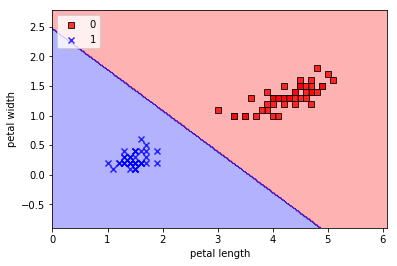

In [0]:
plot_decision_regions(X=x,y=y,classifier=model)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()